In [1]:
import sys
sys.path.insert(0,'..')

from sklearn.preprocessing import MinMaxScaler
from timeit import default_timer as timer
from pygam import LinearGAM, GAM, s, f
from matrixMath import Knotilus
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/pw_data3_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1, logging=True)
end = timer()

model.knotLoc = []
for i in range(model.numKnots):
    model.knotLoc.append(model.variable[int(i * (model.variable.shape[0] / model.numKnots))])

model.knots = model.createKnots(model.knotLoc)

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
# for knot in knotVals:
#     print('Knot:', knot)

plt.title('Synthetic Data: Piecewise Model SofterMax Alpha:1')
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
plt.savefig('../visualizations/alpha_1_model')

Knot: 4   Iteration: 173   Error: 8.766435621648796

Time: 1.419964984


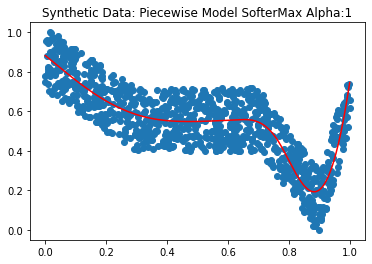

In [2]:
df = pd.read_csv('../data/pw_data3_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1, logging=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
# for knot in knotVals:
#     print('Knot:', knot)

plt.title('Synthetic Data: Piecewise Model SofterMax Alpha:1')
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
plt.savefig('../visualizations/alpha_1_model')

Knot: 4   Iteration: 149   Error: 8.502587526802039

Time: 0.5624666769999749


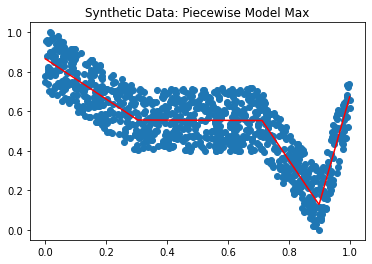

In [67]:
start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1e-8, logging=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
# for knot in knotVals:
#     print('Knot:', knot)

plt.title('Synthetic Data: Piecewise Model Max')
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
plt.savefig('../visualizations/alpha_1e8_model')

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


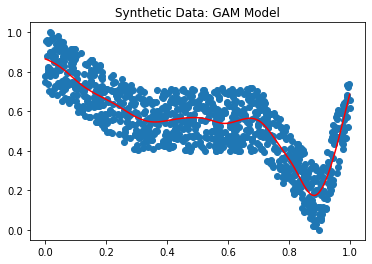

In [66]:
# gam = GAM(s(0, n_splines=4) + s(1) + f(2) + s(3), distribution='gamma', link='log')

lams = np.random.rand(100, 1)
lams = lams * 1 - .5
lams = np.exp(lams)
# gam = LinearGAM(n_splines=10).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
gam =  GAM(s(0)).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
# gam.summary()

plt.title('Synthetic Data: GAM Model')
plt.scatter(foo[0], foo[1])
plt.plot(np.linspace(0, 1, 500), gam.predict(np.linspace(0, 1, 500)), 'r')
plt.savefig('../visualizations/gam_model')

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


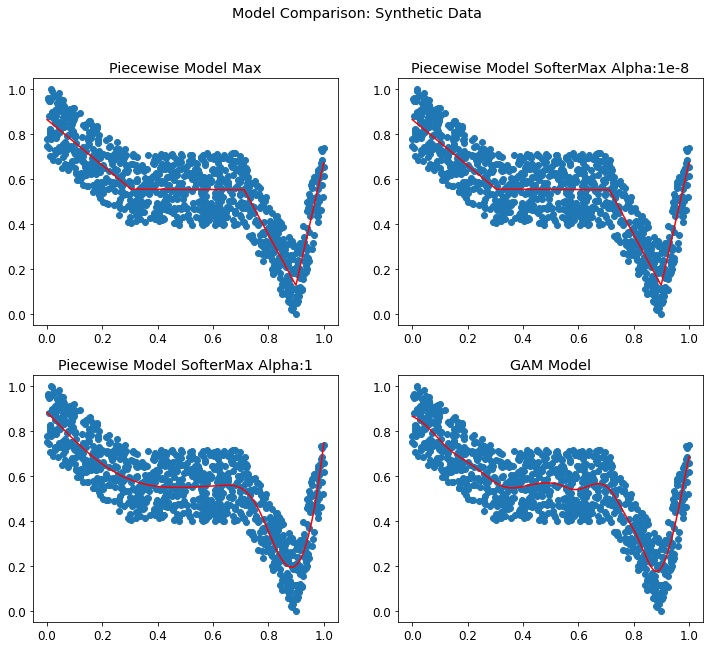

In [12]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax0 = row1[0]
ax1 = row1[1]
ax2 = row2[0]
ax3 = row2[1]
fig.suptitle('Model Comparison: Synthetic Data')

model = Knotilus(foo[0], foo[1])
model.useMax = True
model = model.fit(numKnots=4, verbose=True, logging=True)

ax0.set_title('Piecewise Model Max')
ax0.scatter(foo[0], foo[1])
ax0.plot(foo[0], model.predict(), 'r')

model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1e-8, logging=True)

ax1.set_title('Piecewise Model SofterMax Alpha:1e-8')
ax1.scatter(foo[0], foo[1])
ax1.plot(foo[0], model.predict(), 'r')
# plt.savefig('../visualizations/alpha_1e8_model')

model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1, logging=True)

ax2.set_title('Piecewise Model SofterMax Alpha:1')
ax2.scatter(foo[0], foo[1])
ax2.plot(foo[0], model.predict(), 'r')

lams = np.random.rand(100, 1)
lams = lams * 1 - .5
lams = np.exp(lams)
# gam = LinearGAM(n_splines=10).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
gam =  GAM(s(0)).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
# gam.summary()

ax3.set_title('GAM Model')
ax3.scatter(foo[0], foo[1])
ax3.plot(np.linspace(0, 1, 500), gam.predict(np.linspace(0, 1, 500)), 'r')

plt.rcParams.update({'font.size': 12})

plt.savefig('../visualizations/gam_comparison', dpi=300)

100% (100 of 100) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


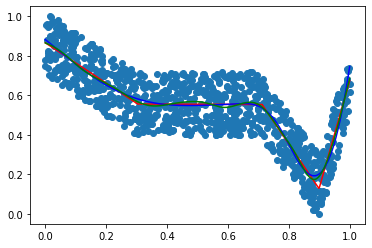

In [71]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig.suptitle('Horizontally stacked subplots')

model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1e-8, logging=True)

# ax1.set_title('Synthetic Data: Piecewise Model Max')
plt.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'r')
# plt.savefig('../visualizations/alpha_1e8_model')

model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=4, verbose=True, gamma=1e-6, alpha=1, logging=True)

# ax2.set_title('Synthetic Data: Piecewise Model SofterMax Alpha:1')
# ax2.scatter(foo[0], foo[1])
plt.plot(foo[0], model.predict(), 'b')

lams = np.random.rand(100, 1)
lams = lams * 1 - .5
lams = np.exp(lams)
# gam = LinearGAM(n_splines=10).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
gam =  GAM(s(0)).gridsearch(np.array(foo[0]).reshape(-1, 1), foo[1], lam=lams)
# gam.summary()

# ax3.set_title('Synthetic Data: GAM Model')
# ax3.scatter(foo[0], foo[1])
plt.plot(np.linspace(0, 1, 500), gam.predict(np.linspace(0, 1, 500)), 'g')
